<a href="https://colab.research.google.com/github/kevin1786/20220702-Python-K/blob/main/20220716.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20220716

## 20220709 - 作業參考解答

In [ ]:
!pip install gradio

In [ ]:
import requests

In [ ]:
def lookup(word):
  url = "https://www.moedict.tw/a/"
  data = requests.get(url + word+ ".json").json()
  return data['English']

In [ ]:
lookup("教室")

'classroom'

In [ ]:
import gradio

In [ ]:
gradio.Interface(lookup, "text", "text", title="漢英字典").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://38294.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f1db68419d0>,
 'http://127.0.0.1:7860/',
 'https://38294.gradio.app')

# 註冊 ZeroJudge

* https://zerojudge.tw/

解解看底下題目：
* https://zerojudge.tw/ShowProblem?problemid=a002
* https://zerojudge.tw/ShowProblem?problemid=a003

## 基本語法

* 迴圈 (loops) => for, while
* 函式 (functions)
* 條件式 (if statements)
* 例外處理 (Exception Handling) 

### 例外處理

In [ ]:
def add(x, y):
  print(f"{x} + {y} = {x + y}")

def sub(x, y):
  print(f"{x} - {y} = {x - y}")

def mul(x, y):
  print(f"{x} x {y} = {x * y}")

def div(x, y):
  print(f"{x} / {y} = {x / y}")

In [ ]:
functions = [add, div, mul, sub]

In [ ]:
x = 4
y = 2
for func in functions:
  func(x, y)

4 + 2 = 6
4 / 2 = 2.0
4 x 2 = 8
4 - 2 = 2


In [ ]:
x = 4
y = 0
for func in functions:
  func(x, y)

4 + 0 = 4


ZeroDivisionError: ignored

In [ ]:
x = 4
y = 0
for func in functions:
  try:
    func(x, y)
  except Exception as e:
    # print(e.args)
    print("發生錯誤")

4 + 0 = 4
發生錯誤
4 x 0 = 0
4 - 0 = 4


# 資料分析簡介

* Numpy
  * Numerical Python
  * 科學運算基礎套件
* MatPlotLib
  * Matrix Plotting Library
  * 繪圖基礎套件
* Pandas
  * Panel Data
  * 資料分析基礎套件

```python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
```

## Numpy

* new data type
  * ndarray => Multi-Dimentional Array
* new functions to process data
  * ufunc => Universal Functions

## 使用原生的Python執行向量運算時會遇到的問題

In [ ]:
x1 = [1, 2, 3]
x2 = [4, 5, 6]

In [ ]:
x1 + x2

[1, 2, 3, 4, 5, 6]

In [ ]:
2*x1

[1, 2, 3, 1, 2, 3]

In [ ]:
list(zip(x1, x2))

[(1, 4), (2, 5), (3, 6)]

In [ ]:
x3 = []
for i, j in zip(x1, x2):
  x3.append(i + j)

In [ ]:
x3

[5, 7, 9]

## Numpy 用來做什麼？

### ndarray ==> 多維陣列

In [ ]:
import numpy as np

In [ ]:
x1

[1, 2, 3]

In [ ]:
x2

[4, 5, 6]

In [ ]:
y1 = np.array(x1)
y2 = np.array(x2)

In [ ]:
y1 + y2

array([5, 7, 9])

In [ ]:
2 * y1

array([2, 4, 6])

### ufunc ==> 通用函式

In [ ]:
# 在原生的python中
import math

In [ ]:
math.sin(math.pi/2)

1.0

In [ ]:
math.sin(x1)

TypeError: ignored

In [ ]:
# 在 numpy 中
np.sin(np.pi/2)

1.0

In [ ]:
np.sin(x1)

array([0.84147098, 0.90929743, 0.14112001])

### 什麼地方會用到ndarray?

In [ ]:
import cv2

In [ ]:
im = cv2.imread("lin.jpg")

In [ ]:
type(im)

numpy.ndarray

In [ ]:
im.shape

(1440, 1080, 3)

In [ ]:
import matplotlib.pyplot as plt

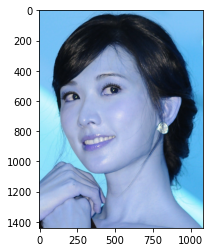

In [ ]:
plt.imshow(im)

# 如何用Python畫地圖

LBS: Location-Based Service

Folium快速入門:
* https://python-visualization.github.io/folium/quickstart.html

In [ ]:
import folium

m = folium.Map(location=[45.5236, -122.6750])

In [ ]:
m

In [ ]:
m = folium.Map(location=[22.6273, 120.3014])
m

In [ ]:
m = folium.Map(location=[22.6273, 120.3014], zoom_start=16)
m

In [ ]:
# 存成網頁
m.save("index.html")

In [ ]:
m = folium.Map(location=[22.6273, 120.3014], zoom_start=16)
folium.Marker([22.6273, 120.3014], popup="高雄市").add_to(m)
m

## 使用 geocoder 查詢 GPS 座標

https://geocoder.readthedocs.io/

In [ ]:
!pip install geocoder

In [ ]:
import geocoder

In [ ]:
geocoder.osm("台北市").latlng

[25.0375198, 121.5636796]

## 練習:請使用 geocoder + folium 畫出台北市地圖

In [ ]:
place = "文藻外語大學"
gps = geocoder.osm(place).latlng
m = folium.Map(location=gps, zoom_start=16)
folium.Marker(gps, popup=place).add_to(m)
m

In [ ]:
def draw_map(place):
  gps = geocoder.osm(place).latlng
  m = folium.Map(location=gps, zoom_start=16)
  folium.Marker(gps, popup=place).add_to(m)
  return m

In [ ]:
draw_map("台北市")

## 練習：到政府資料開放平台，下載台北市YouBike站點資料，將之畫在地圖上

https://data.gov.tw/dataset/137993

https://tcgbusfs.blob.core.windows.net/dotapp/youbike/v2/youbike_immediate.json

In [ ]:
import requests

In [ ]:
url = "https://tcgbusfs.blob.core.windows.net/dotapp/youbike/v2/youbike_immediate.json"

In [ ]:
data = requests.get(url).json()

In [ ]:
type(data)

list

In [ ]:
data[0]

{'act': '1',
 'ar': '復興南路二段235號前',
 'aren': 'No.235， Sec. 2， Fuxing S. Rd.',
 'bemp': 25,
 'infoDate': '2022-07-16',
 'infoTime': '2022-07-16 11:51:37',
 'lat': 25.02605,
 'lng': 121.5436,
 'mday': '2022-07-16 11:51:37',
 'sarea': '大安區',
 'sareaen': 'Daan Dist.',
 'sbi': 3,
 'sna': 'YouBike2.0_捷運科技大樓站',
 'snaen': 'YouBike2.0_MRT Technology Bldg. Sta.',
 'sno': '500101001',
 'srcUpdateTime': '2022-07-16 11:54:12',
 'tot': 28,
 'updateTime': '2022-07-16 11:54:24'}

### 練習01. 請使用for迴圈print出所有站點名稱及GPS座標

In [ ]:
for x in data:
  print(f"{x['sna']} ==> ({x['lat']}, {x['lng']})")

### 練習02. 請在地圖上標出所有站點位置及名稱。

In [ ]:
def draw_map(place):
  gps = geocoder.osm(place).latlng
  m = folium.Map(location=gps, zoom_start=16)
  folium.Marker(gps, popup=place, icon=folium.Icon(color="red")).add_to(m)
  return m

In [ ]:
m = draw_map("台北市")

In [ ]:
for x in data:
  folium.Marker([x['lat'],x['lng']], popup=x['sna']).add_to(m)

In [ ]:
m